In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

logisticX_df = pd.read_csv('../data/q3/logisticX.csv')
logisticY_df = pd.read_csv('../data/q3/logisticY.csv')

logisticX_df.head(), logisticY_df.head()


(   3.8915  4.2105
 0  3.6898  6.6051
 1  2.7763  7.5057
 2  3.1137  5.7724
 3  2.9251  5.4315
 4  3.6699  6.4406,
    0
 0  0
 1  0
 2  0
 3  0
 4  0)

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_likelihood(X, y, theta):
    z = X.dot(theta)
    h = sigmoid(z)
    return np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

def gradient(X, y, theta):
    z = X.dot(theta)
    h = sigmoid(z)
    return X.T.dot(y - h)

def hessian(X, theta):
    z = X.dot(theta)
    h = sigmoid(z)
    return -X.T.dot(np.diag(h * (1 - h))).dot(X)

def newton_method(X, y, tol=1e-6, max_iter=100):
    m, n = X.shape
    theta = np.zeros(n)  # Initialize theta
    log_likelihood_values = []  # Store log-likelihood at each iteration
    
    for i in range(max_iter):
        grad = gradient(X, y, theta)
        H = hessian(X, theta)
        theta_update = np.linalg.inv(H).dot(grad)
        
        
        theta -= theta_update
        
        # Compute log-likelihood
        ll = log_likelihood(X, y, theta)
        log_likelihood_values.append(ll)
        
        # Check for convergence
        if np.linalg.norm(theta_update, 2) < tol:
            print(f"Newton's method converged after {i+1} iterations.")
            break

    return theta, log_likelihood_values

# Prepare data for logistic regression
X = logisticX_df.values
y = logisticY_df.values.ravel()
X = np.c_[np.ones(X.shape[0]), X]  # Add intercept term

theta_optimal, log_likelihood_values = newton_method(X, y)
theta_optimal


Newton's method converged after 8 iterations.


array([ 0.55952206,  1.93247687, -1.99558285])

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(logisticX_df.values)

X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

theta_optimal_scaled, log_likelihood_values_scaled = newton_method(X_scaled, y)
theta_optimal_scaled


Newton's method converged after 8 iterations.


array([ 0.46722676,  2.55770122, -2.78143761])

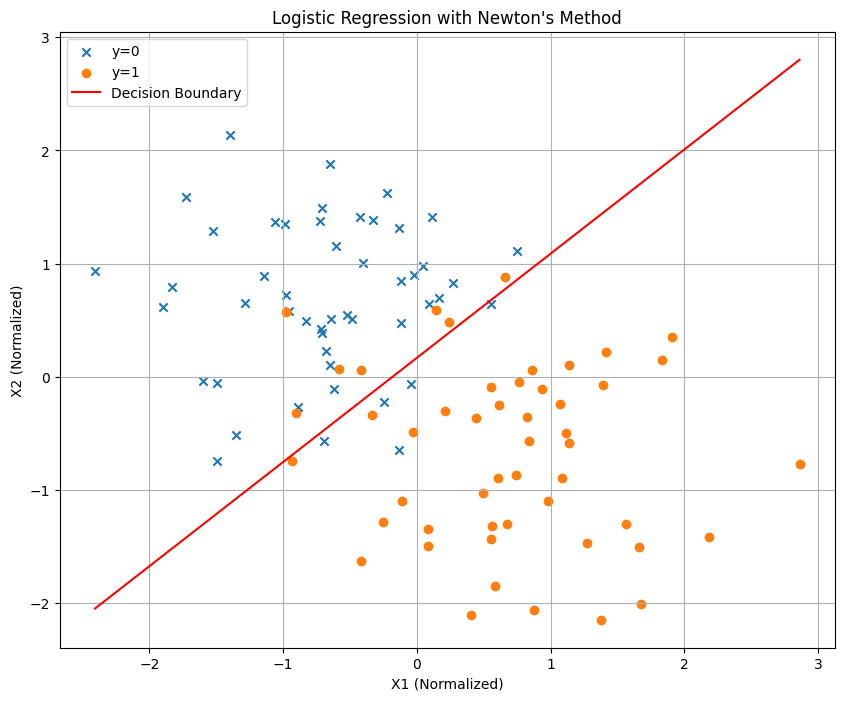

In [4]:
plt.figure(figsize=(10, 8))

plt.scatter(X_scaled[y == 0, 1], X_scaled[y == 0, 2], label='y=0', marker='x')
plt.scatter(X_scaled[y == 1, 1], X_scaled[y == 1, 2], label='y=1', marker='o')

# Plot decision boundary (theta * x = 0)
x_values = np.linspace(np.min(X_scaled[:, 1]), np.max(X_scaled[:, 1]), 100)
y_values = -(theta_optimal_scaled[0] + theta_optimal_scaled[1] * x_values) / theta_optimal_scaled[2]
plt.plot(x_values, y_values, label='Decision Boundary', color='red')

# Labels and legend
plt.xlabel('X1 (Normalized)')
plt.ylabel('X2 (Normalized)')
plt.title('Logistic Regression with Newton\'s Method')
plt.legend()
plt.grid(True)
plt.savefig('plot.jpg')

plt.show()


Data points with 
y=0 are marked with 'x'.
Data points with 
y=1 are marked with 'o'.
The red line represents the decision boundary determined by the logistic regression model.